<a href="https://colab.research.google.com/github/WPNJoherrera/DATA-ANALYTICS/blob/Proyectos/Proy04JoHerrera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto No 04 ( SINIESTROS )
#Jose Herrera Sancho

#CARGA LIBRERIAS PHYTON

In [3]:
!pip install statistics

from scipy import stats as nstats

import pandas as pd
import seaborn as sns
import statistics as stats # estadística
import numpy as np
import scipy


import matplotlib.pyplot as plt

#GOOGLE DRIVE

In [4]:
#cargamos la data desde Google Drive
from google.colab import drive
drive.mount('/content/JoHS-Drive/')

Drive already mounted at /content/JoHS-Drive/; to attempt to forcibly remount, call drive.mount("/content/JoHS-Drive/", force_remount=True).


##LOAD DATASET

In [5]:
dataSet = pd.read_excel('/content/JoHS-Drive/MyDrive/Data & Analitics (Phyton Machine Learning)/Data/Siniestros.xlsx')
dataSet.head()



,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
0,185,44.0,1.0,604.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
1,238,79.0,1.0,1006.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
2,346,102.0,1.0,299.23,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
3,460,NaN,1.0,645.19,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
4,549,109.0,NaN,218.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no


In [ ]:
dataSet.info()


#EXPLORACION DE DATOS

##Verificacion de datos perdidos

In [6]:
#Preparacion del DSet Para el analisis.

dfSiniestros = dataSet.copy(deep=True)

print("La cantidad de columnas en los datos es: ", dfSiniestros.shape[1])
print("La cantidad de filas en los datos es   : ", dfSiniestros.shape[0])
print("Cantidad de registros duplicados es    : ", dfSiniestros.duplicated().sum() )

dfSiniestros.isna().sum()


La cantidad de columnas en los datos es:  18
La cantidad de filas en los datos es   :  5800
Cantidad de registros duplicados es    :  0


Cliente_ID                0
Antigüedad_Maxima       587
Nivel_Ingresos          273
Saldo_Pendiente           0
Puntaje_Morosidad1        0
Puntaje_Morosidad2      186
Puntaje_Morosidad3      256
Puntaje_Morosidad4      340
Puntaje_Morosidad5      403
Puntaje_Morosidad6      476
Saldo_Pendiente_Seg       0
Siniestros1               0
Siniestros2               0
Siniestros3               0
Siniestros4               0
Siniestros5               0
Siniestros6               0
Estado_Siniestro       1068
dtype: int64

#DERIVACION DE LOS DATOS

In [7]:
df = dfSiniestros.copy(deep=True)

#CLASIFICACION DE LOS DATOS


In [44]:
#Conversion del Cliente_ID, al tipo string. Con el fin de que
#no sea parte de los datos calculables.

var_str = ["Cliente_ID", "Nivel_Ingresos"]
df[var_str] = df[var_str].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente_ID           5800 non-null   object 
 1   Antigüedad_Maxima    5800 non-null   float64
 2   Nivel_Ingresos       5800 non-null   object 
 3   Saldo_Pendiente      5800 non-null   float64
 4   Puntaje_Morosidad1   5800 non-null   int64  
 5   Puntaje_Morosidad2   5800 non-null   float64
 6   Puntaje_Morosidad3   5800 non-null   float64
 7   Puntaje_Morosidad4   5800 non-null   float64
 8   Puntaje_Morosidad5   5800 non-null   float64
 9   Puntaje_Morosidad6   5800 non-null   float64
 10  Saldo_Pendiente_Seg  5800 non-null   float64
 11  Siniestros1          5800 non-null   int64  
 12  Siniestros2          5800 non-null   int64  
 13  Siniestros3          5800 non-null   int64  
 14  Siniestros4          5800 non-null   int64  
 15  Siniestros5          5800 non-null   i

In [10]:
var_numCol = df.select_dtypes(include=['float64', 'int']).columns

var_strCol = df.select_dtypes(include=['object']).columns

df[var_numCol].head()

,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6
0,44.0,1.0,604.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,79.0,1.0,1006.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,102.0,1.0,299.23,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,NaN,1.0,645.19,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4,109.0,NaN,218.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [11]:
df[var_strCol].head()

,Cliente_ID,Estado_Siniestro
0,185,no
1,238,no
2,346,no
3,460,no
4,549,no


#A.MEDIDAS DE TENDENCIA CENTRAL

##Media

In [12]:
def scipyMean(x):
  return scipy.nanmean(x)

# Media
df[var_numCol].apply(scipyMean, axis=0).round(2)

<ipython-input-12-fa10dbd171ac>:2: DeprecationWarning: scipy.nanmean is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmean instead
  return scipy.nanmean(x)


Antigüedad_Maxima        49.85
Nivel_Ingresos            1.07
Saldo_Pendiente        3240.98
Puntaje_Morosidad1        0.20
Puntaje_Morosidad2        0.24
Puntaje_Morosidad3        0.22
Puntaje_Morosidad4        0.19
Puntaje_Morosidad5        0.19
Puntaje_Morosidad6        0.17
Saldo_Pendiente_Seg    4970.52
Siniestros1               0.78
Siniestros2               0.70
Siniestros3               0.65
Siniestros4               0.59
Siniestros5               0.55
Siniestros6               0.50
dtype: float64

##Mediana

In [13]:
def scipyMedian(x):
  return scipy.nanmedian(x)

# Media
df[var_numCol].apply(scipyMedian, axis=0).round(2)

<ipython-input-13-bde2716fd830>:2: DeprecationWarning: scipy.nanmedian is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmedian instead
  return scipy.nanmedian(x)


Antigüedad_Maxima        34.00
Nivel_Ingresos            1.00
Saldo_Pendiente        1100.32
Puntaje_Morosidad1        0.00
Puntaje_Morosidad2        0.00
Puntaje_Morosidad3        0.00
Puntaje_Morosidad4        0.00
Puntaje_Morosidad5        0.00
Puntaje_Morosidad6        0.00
Saldo_Pendiente_Seg       0.00
Siniestros1               0.00
Siniestros2               0.00
Siniestros3               0.00
Siniestros4               0.00
Siniestros5               0.00
Siniestros6               0.00
dtype: float64

##Moda

In [14]:
from collections import Counter

def Moda(x):
  c = Counter(x)
  return c.most_common(1)

df[var_numCol].apply(Moda, axis=0)

,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6
0,"(7.0, 165)","(1.0, 2496)","(0.0, 331)","(0, 5158)","(0.0, 4941)","(0.0, 4915)","(0.0, 4886)","(0.0, 4830)","(0.0, 4784)","(0.0, 5324)","(0, 4798)","(0, 4878)","(0, 4882)","(0, 4931)","(0, 4970)","(0, 5031)"


##Centro Amplitud.
Es el valor que queda en medio de los valores mínimo y maximo.

In [15]:
def centroAmplitud(x):
  return (max(x) + min(x))/2  # Asignación múltiple


df[var_numCol].apply(centroAmplitud, axis=0).round(2)

Antigüedad_Maxima         127.50
Nivel_Ingresos              2.50
Saldo_Pendiente         62051.04
Puntaje_Morosidad1          3.00
Puntaje_Morosidad2          3.50
Puntaje_Morosidad3          3.50
Puntaje_Morosidad4          3.50
Puntaje_Morosidad5          3.50
Puntaje_Morosidad6          3.50
Saldo_Pendiente_Seg    221167.40
Siniestros1               144.50
Siniestros2               144.50
Siniestros3               144.50
Siniestros4               144.50
Siniestros5               144.50
Siniestros6               144.00
dtype: float64

##Media Geométrica

In [16]:
#import numpy as np

def media_geometrica(iterable):
  ''' Calcula la media geométrica'''
  a = np.log(iterable)
  return "Media Geométrica", np.exp(a.sum()/len(a)).round(2)

df[var_numCol].apply(media_geometrica, axis=0)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6
0,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Imputación de los valores perdidos nan.
Se debe de imputar, para evitar datos perdidos en los calaculos de curtosis y correlaciones.

In [17]:
def imputacionData(x):
  m = scipy.nanmean(x) #stats.mean(x)
  return m

dMean = df[var_numCol].apply(imputacionData, axis=0).round(2)

df.fillna(dMean, inplace=True)

df.isna().sum()


<ipython-input-17-ec06072fffe5>:2: DeprecationWarning: scipy.nanmean is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmean instead
  m = scipy.nanmean(x) #stats.mean(x)


Cliente_ID                0
Antigüedad_Maxima         0
Nivel_Ingresos            0
Saldo_Pendiente           0
Puntaje_Morosidad1        0
Puntaje_Morosidad2        0
Puntaje_Morosidad3        0
Puntaje_Morosidad4        0
Puntaje_Morosidad5        0
Puntaje_Morosidad6        0
Saldo_Pendiente_Seg       0
Siniestros1               0
Siniestros2               0
Siniestros3               0
Siniestros4               0
Siniestros5               0
Siniestros6               0
Estado_Siniestro       1068
dtype: int64

## Media Armónica


In [18]:
# Función:
def media_armonica(x):
  return "Media Armónica", round(stats.harmonic_mean(x),2)

df[var_numCol].apply(media_armonica, axis=0)


,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6
0,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Media Recortada con scipy.
Por la existencias de datos perdidos, se recorta Al 20%; 10% en cada lado

In [19]:
def media_recortada(x):
  mr = nstats.trim_mean(x, proportiontocut=0.1).round(2) # 20% pq es 10% de cada lado
  return "Media recortada al 20%", mr

df[var_numCol].apply(media_recortada, axis=0)


,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6
0,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%
1,43.1,0.89,1877.51,0.01,0.03,0.02,0.01,0.02,0.02,0.0,0.09,0.07,0.07,0.06,0.05,0.04


##TriMedia

In [20]:
def trimedia(x: pd.Series):
    #Obtenemos los "Quartiles"
    Q1 = x.quantile([.25]).values[0]
    Q2 = x.quantile([.50]).values[0]
    Q3 = x.quantile([.75]).values[0]
    t = (Q1 + 2*Q2 + Q3) / 4
    return t

df[var_numCol].apply(trimedia, axis=0).round(2)

Antigüedad_Maxima        41.50
Nivel_Ingresos            0.75
Saldo_Pendiente        1448.93
Puntaje_Morosidad1        0.00
Puntaje_Morosidad2        0.00
Puntaje_Morosidad3        0.00
Puntaje_Morosidad4        0.00
Puntaje_Morosidad5        0.00
Puntaje_Morosidad6        0.00
Saldo_Pendiente_Seg       0.00
Siniestros1               0.00
Siniestros2               0.00
Siniestros3               0.00
Siniestros4               0.00
Siniestros5               0.00
Siniestros6               0.00
dtype: float64

##Varias medidas de tendencia central y gráficos.

In [21]:
#df.info()

In [22]:
pd.pivot_table(df, index=["Estado_Siniestro"],
               aggfunc=["mean", "median"]).reset_index().round(2)



<ipython-input-22-6c5172b3e1d4>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(df, index=["Estado_Siniestro"],
<ipython-input-22-6c5172b3e1d4>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(df, index=["Estado_Siniestro"],


Estado_Siniestro              mean                                    \
                   Antigüedad_Maxima Nivel_Ingresos Puntaje_Morosidad1   
0               no             57.10           1.22               0.05   
1               si             31.95           0.64               1.12   

                                                                               \
  Puntaje_Morosidad2 Puntaje_Morosidad3 Puntaje_Morosidad4 Puntaje_Morosidad5   
0               0.09               0.09               0.08               0.09   
1               1.12               0.94               0.79               0.73   

                                      ...             median  \
  Puntaje_Morosidad6 Saldo_Pendiente  ... Puntaje_Morosidad5   
0               0.09         3749.81  ...                0.0   
1               0.61         2893.36  ...                0.0   

                                                                      \
  Puntaje_Morosidad6 Saldo_Pendiente Saldo_Pendiente_Seg Siniestros1   
0                0.0         1298.09                 0.0           0   
1                0.0         1306.61                 0.0           1   

                                                               
  Siniestros2 Siniestros3 Siniestros4 Siniestros5 Siniestros6  
0           0           0           0           0           0  
1           1           1           0           0           0  

[2 rows x 33 columns]

In [23]:
mediasDf = pd.pivot_table(df, index=["Estado_Siniestro"], aggfunc="mean").reset_index().round(2)

mediasDf

<ipython-input-23-6e16447adf39>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  mediasDf = pd.pivot_table(df, index=["Estado_Siniestro"], aggfunc="mean").reset_index().round(2)


,Estado_Siniestro,Antigüedad_Maxima,Nivel_Ingresos,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6
0,no,57.10,1.22,0.05,0.09,0.09,0.08,0.09,0.09,3749.81,6082.11,0.32,0.30,0.30,0.30,0.29,0.27
1,si,31.95,0.64,1.12,1.12,0.94,0.79,0.73,0.61,2893.36,994.75,3.28,2.66,2.11,1.83,1.53,1.32


<ipython-input-24-726b97d01ef8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(y="Antigüedad_Maxima",


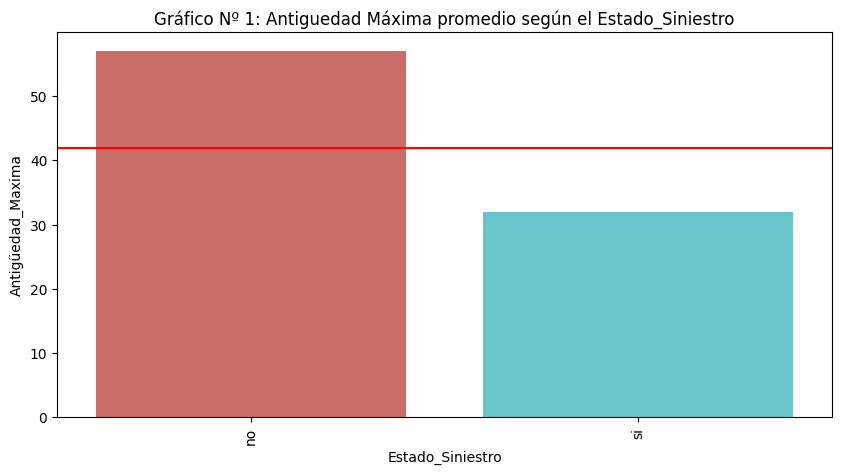

In [24]:
# Graficamos las medias según una variable
plt.figure(figsize=(10,5))

g = sns.barplot(y="Antigüedad_Maxima",
            x="Estado_Siniestro",
            data=mediasDf,
            palette="hls" # "Blues"
            )
g.set_xlabel("Estado_Siniestro")
g.set_ylabel("Antigüedad_Maxima")
g.set_title("Gráfico Nº 1: Antiguedad Máxima promedio según el Estado_Siniestro")

plt.axhline(42, color = 'red')  # añadimos una línea
plt.xticks(rotation=90)  # rotación del texto eje X
plt.show()

#B. MEDIDAS DE DISPERSION

##1.Rango

In [25]:
def rango(x):
  min = np.min(x)
  max = np.max(x)
  r = max - min
  return min, max, r

d = df[var_numCol].apply(rango, axis=0).T
d.columns = ["Mínimo","Máximo","Rango"]
d

,Mínimo,Máximo,Rango
Antigüedad_Maxima,0.0,255.00,255.00
Nivel_Ingresos,0.0,5.00,5.00
Saldo_Pendiente,0.0,124102.08,124102.08
Puntaje_Morosidad1,0.0,6.00,6.00
Puntaje_Morosidad2,0.0,7.00,7.00
Puntaje_Morosidad3,0.0,7.00,7.00
Puntaje_Morosidad4,0.0,7.00,7.00
Puntaje_Morosidad5,0.0,7.00,7.00
Puntaje_Morosidad6,0.0,7.00,7.00
Saldo_Pendiente_Seg,0.0,442334.80,442334.80


##2.Cuartiles

In [26]:
def cuartiles(x: pd.Series):
    #Obtenemos los "Quartiles"
    Q1 = x.quantile([.25]).values[0]
    Q2 = x.quantile([.50]).values[0]
    Q3 = x.quantile([.75]).values[0]
    min = np.min(x)
    max = np.max(x)
    return min, Q1, Q2, Q3, max

d = df[var_numCol].apply(cuartiles, axis=0).T.round(0)
d.columns = ["Mínimo","P25% - Q1","P50% - Q2", "P75% - Q3", "Máximo"]
d

,Mínimo,P25% - Q1,P50% - Q2,P75% - Q3,Máximo
Antigüedad_Maxima,0.0,14.0,42.0,68.0,255.0
Nivel_Ingresos,0.0,0.0,1.0,1.0,5.0
Saldo_Pendiente,0.0,330.0,1100.0,3265.0,124102.0
Puntaje_Morosidad1,0.0,0.0,0.0,0.0,6.0
Puntaje_Morosidad2,0.0,0.0,0.0,0.0,7.0
Puntaje_Morosidad3,0.0,0.0,0.0,0.0,7.0
Puntaje_Morosidad4,0.0,0.0,0.0,0.0,7.0
Puntaje_Morosidad5,0.0,0.0,0.0,0.0,7.0
Puntaje_Morosidad6,0.0,0.0,0.0,0.0,7.0
Saldo_Pendiente_Seg,0.0,0.0,0.0,0.0,442335.0


Text(0.5, 1.0, 'Gráfico Nº XX: Siniestro según la Antiguedad')

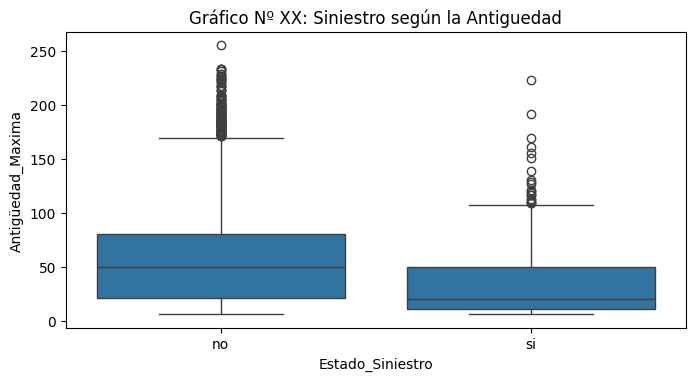

In [27]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 3.84))

g=sns.boxplot(
        x     = 'Estado_Siniestro',  # variable cualitativa
        y     = 'Antigüedad_Maxima',  # variable cuantitativa
        data  = df,   # dataframe
        ax    = ax
    )

g.set_xlabel("Estado_Siniestro")
g.set_ylabel("Antigüedad_Maxima")
g.set_title("Gráfico Nº XX: Siniestro según la Antiguedad")

##3.Rango intercuartil.

In [28]:
def rango_intercuartil(x: pd.Series): # RIC
    #Obtenemos los "Quartiles"
    Q1 = x.quantile([.25]).values[0]
    Q3 = x.quantile([.75]).values[0]

    return Q1, Q3 - Q1, Q3

d= df[var_numCol].apply(rango_intercuartil, axis=0).T
d.columns = ["Q1","RIC","Q3"]
d

,Q1,RIC,Q3
Antigüedad_Maxima,14.0000,54.000,68.0000
Nivel_Ingresos,0.0000,1.000,1.0000
Saldo_Pendiente,329.7475,2935.575,3265.3225
Puntaje_Morosidad1,0.0000,0.000,0.0000
Puntaje_Morosidad2,0.0000,0.000,0.0000
Puntaje_Morosidad3,0.0000,0.000,0.0000
Puntaje_Morosidad4,0.0000,0.000,0.0000
Puntaje_Morosidad5,0.0000,0.000,0.0000
Puntaje_Morosidad6,0.0000,0.000,0.0000
Saldo_Pendiente_Seg,0.0000,0.000,0.0000


##4.Varianza

In [29]:
import numpy as np

df[var_numCol].apply(np.var, axis=0).round(2)


Antigüedad_Maxima      1.989320e+03
Nivel_Ingresos         1.280000e+00
Saldo_Pendiente        3.791101e+07
Puntaje_Morosidad1     4.600000e-01
Puntaje_Morosidad2     7.700000e-01
Puntaje_Morosidad3     6.800000e-01
Puntaje_Morosidad4     5.700000e-01
Puntaje_Morosidad5     5.200000e-01
Puntaje_Morosidad6     4.600000e-01
Saldo_Pendiente_Seg    4.846388e+08
Siniestros1            2.391000e+01
Siniestros2            2.252000e+01
Siniestros3            2.173000e+01
Siniestros4            2.093000e+01
Siniestros5            2.011000e+01
Siniestros6            1.937000e+01
dtype: float64

##5.Desviación Estándar

In [30]:
df[var_numCol].apply(np.std, axis=0).round(2)

Antigüedad_Maxima         44.60
Nivel_Ingresos             1.13
Saldo_Pendiente         6157.19
Puntaje_Morosidad1         0.68
Puntaje_Morosidad2         0.88
Puntaje_Morosidad3         0.82
Puntaje_Morosidad4         0.76
Puntaje_Morosidad5         0.72
Puntaje_Morosidad6         0.68
Saldo_Pendiente_Seg    22014.51
Siniestros1                4.89
Siniestros2                4.75
Siniestros3                4.66
Siniestros4                4.58
Siniestros5                4.48
Siniestros6                4.40
dtype: float64

##6.Coeficiente de variación

In [31]:
def coeficiente_variacion(x):
  m = scipy.nanmean(x) #stats.mean(x) #Se utiliza nanmean por la existencia de datos perdidos
  sd = np.std(x)
  return sd/m*100

df[var_numCol].apply(coeficiente_variacion, axis=0).round(2), "Porciento %"

<ipython-input-31-2a2b5d51d34c>:2: DeprecationWarning: scipy.nanmean is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmean instead
  m = scipy.nanmean(x) #stats.mean(x) #Se utiliza nanmean por la existencia de datos perdidos


(Antigüedad_Maxima       89.48
 Nivel_Ingresos         105.54
 Saldo_Pendiente        189.98
 Puntaje_Morosidad1     340.65
 Puntaje_Morosidad2     360.22
 Puntaje_Morosidad3     373.97
 Puntaje_Morosidad4     391.85
 Puntaje_Morosidad5     386.42
 Puntaje_Morosidad6     393.83
 Saldo_Pendiente_Seg    442.90
 Siniestros1            623.89
 Siniestros2            681.86
 Siniestros3            721.73
 Siniestros4            769.83
 Siniestros5            821.75
 Siniestros6            872.44
 dtype: float64,
 'Porciento %')

##7.Cuantiles
Filtrado las edades, con la condicional de edad mayor a 0. Con el fin de no tener edad minima en 0

In [34]:

filtered_df = df.query('Antigüedad_Maxima  > 0')
Q = filtered_df["Antigüedad_Maxima"].quantile([.75])


print("Mínimo:", min( filtered_df["Antigüedad_Maxima"].round(2)) )
print('Cuantil -->', round(Q, 2))
print("Máximo:", max( filtered_df["Antigüedad_Maxima"].round(2)) )


Mínimo: 1.0
Cuantil --> 0.75    70.0
Name: Antigüedad_Maxima, dtype: float64
Máximo: 255.0


##8.Curtosis

In [35]:
from scipy.stats import kurtosis

def kurtosis_data(x):

  curtosis =  kurtosis(x, fisher=True)
  if curtosis != np.NAN:

    if curtosis >0:
      return ('Es Leptocúrtica-->', round(curtosis,2 ))
    elif curtosis ==0: # 0.03
      return  ('Es Mesocúrtica-->', round(curtosis,2 ))
    else:
      return  ('Es Platicúrtica-->', round(curtosis,2 ))

df[var_numCol].apply(kurtosis_data, axis=0).T

,0,1
Antigüedad_Maxima,Es Leptocúrtica-->,1.66
Nivel_Ingresos,Es Leptocúrtica-->,1.39
Saldo_Pendiente,Es Leptocúrtica-->,56.74
Puntaje_Morosidad1,Es Leptocúrtica-->,22.44
Puntaje_Morosidad2,Es Leptocúrtica-->,34.83
Puntaje_Morosidad3,Es Leptocúrtica-->,40.46
Puntaje_Morosidad4,Es Leptocúrtica-->,49.01
Puntaje_Morosidad5,Es Leptocúrtica-->,52.56
Puntaje_Morosidad6,Es Leptocúrtica-->,59.48
Saldo_Pendiente_Seg,Es Leptocúrtica-->,71.5


#C.CORRELACIONES "R DE PEARSON" & "RHO DE SPEARMAN"

El coeficiente de correlación puede tomar un rango de valores de +1 a -1.

Un valor de 0 indica que no hay asociación entre las dos variables.

Un valor mayor que 0 indica una asociación positiva.


> Es decir, a medida que aumenta el valor de una variable, también lo hace el valor de la otra.

Un valor menor que 0 indica una asociación negativa.


> Es decir, a medida que aumenta el valor de una variable, el valor de la otra disminuye.

<Figure size 600x400 with 0 Axes>

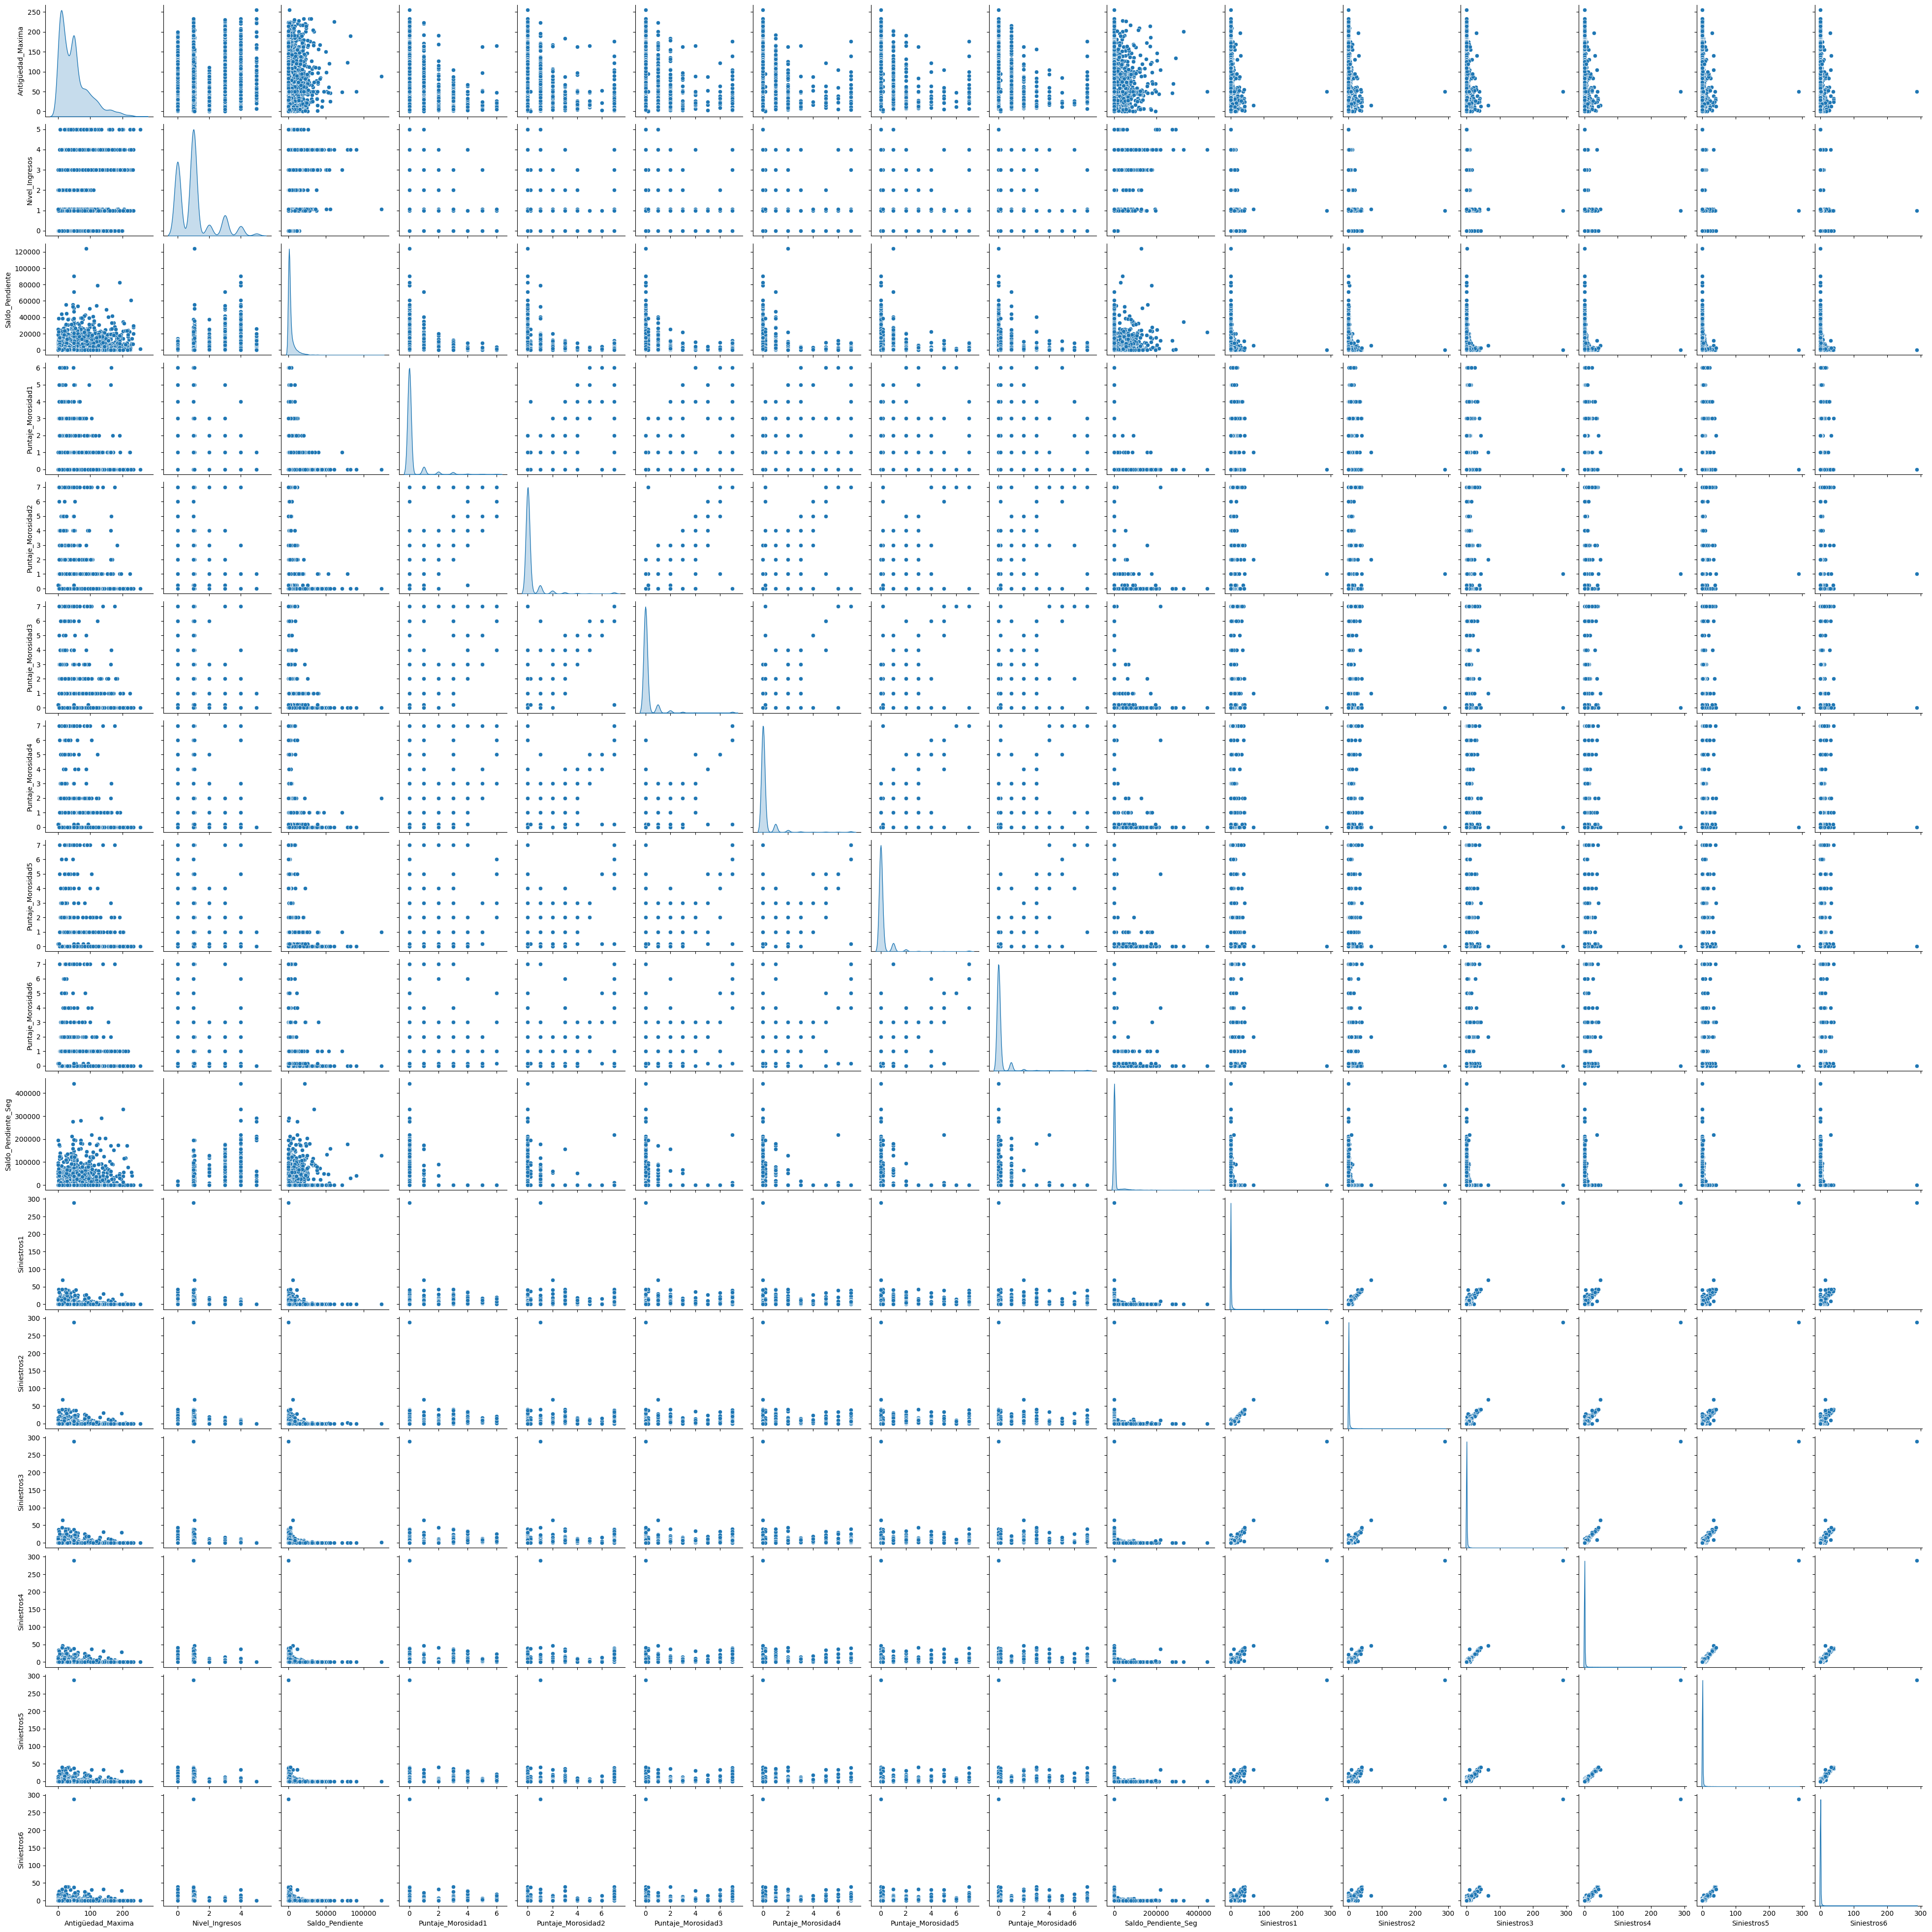

In [36]:
plt.figure(figsize=(6,4))

sns.pairplot(df[var_numCol], diag_kind='kde');


##Correlación: r de pearson

In [38]:
correlacion = df[var_numCol].corr(method='pearson').round(2)  # paramétrico

correlacion

,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6
Antigüedad_Maxima,1.00,0.32,0.17,-0.11,-0.08,-0.07,-0.06,-0.05,-0.04,0.11,-0.04,-0.03,-0.03,-0.02,-0.02,-0.01
Nivel_Ingresos,0.32,1.00,0.36,-0.13,-0.08,-0.07,-0.06,-0.06,-0.05,0.30,-0.05,-0.05,-0.04,-0.03,-0.03,-0.03
Saldo_Pendiente,0.17,0.36,1.00,-0.03,-0.04,-0.04,-0.03,-0.02,-0.02,0.25,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03
Puntaje_Morosidad1,-0.11,-0.13,-0.03,1.00,0.61,0.52,0.40,0.34,0.28,-0.05,0.26,0.22,0.19,0.15,0.13,0.11
Puntaje_Morosidad2,-0.08,-0.08,-0.04,0.61,1.00,0.89,0.82,0.76,0.69,-0.03,0.29,0.27,0.25,0.23,0.21,0.19
Puntaje_Morosidad3,-0.07,-0.07,-0.04,0.52,0.89,1.00,0.88,0.81,0.74,-0.03,0.25,0.23,0.22,0.21,0.19,0.17
Puntaje_Morosidad4,-0.06,-0.06,-0.03,0.40,0.82,0.88,1.00,0.87,0.80,-0.02,0.22,0.21,0.21,0.20,0.18,0.17
Puntaje_Morosidad5,-0.05,-0.06,-0.02,0.34,0.76,0.81,0.87,1.00,0.87,-0.03,0.21,0.20,0.20,0.20,0.18,0.17
Puntaje_Morosidad6,-0.04,-0.05,-0.02,0.28,0.69,0.74,0.80,0.87,1.00,-0.02,0.21,0.20,0.20,0.20,0.18,0.17
Saldo_Pendiente_Seg,0.11,0.30,0.25,-0.05,-0.03,-0.03,-0.02,-0.03,-0.02,1.00,-0.03,-0.02,-0.02,-0.01,-0.01,-0.01


##Mapa de Calor correlación de las variables numéricas

Text(0.5, 1.0, 'Gráfico Nº XX: Gráfico de la correlación de las variables numéricas')

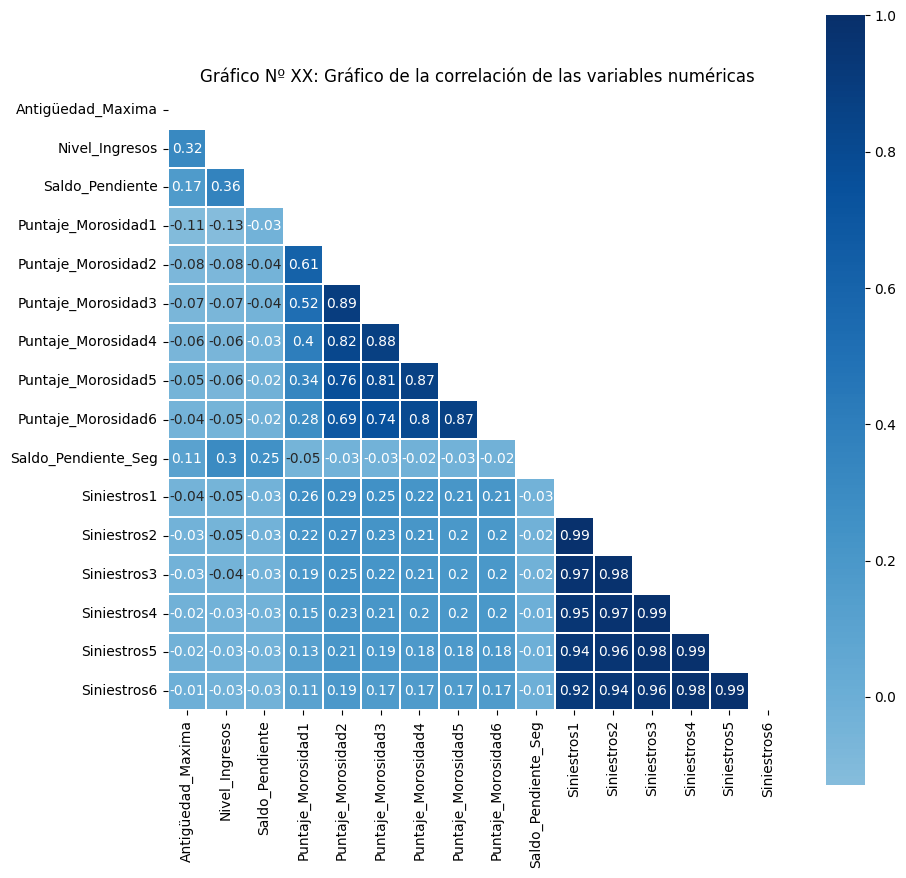

In [39]:

mask = np.triu(np.ones_like(correlacion, dtype=bool )) #la máscara para el triángulo superior del gráfico

f, ax = plt.subplots(figsize = (10,10)) # la base para el gráfico

g = sns.heatmap(correlacion, mask = mask, cmap='Blues', vmax=1, center = 0,
            square = True, linewidths=.1, annot=True)

g.set_title("Gráfico Nº XX: Gráfico de la correlación de las variables numéricas")



##scatterplot correlación de variables.

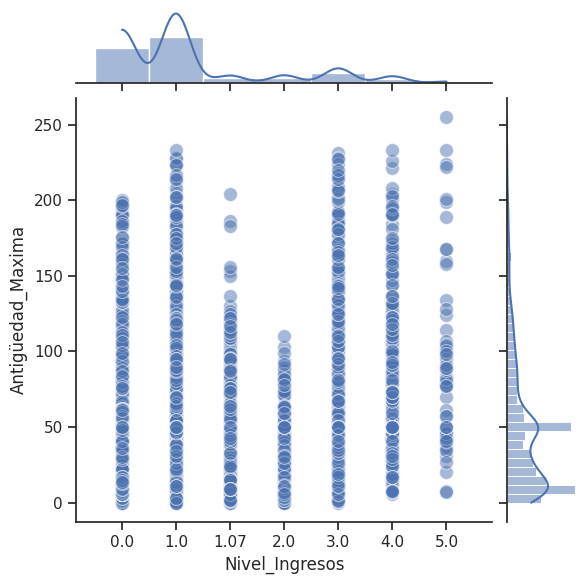

In [53]:

# sort freq
dfSort = df.sort_values('Nivel_Ingresos', ascending=True, inplace=False)

g = sns.JointGrid(x="Nivel_Ingresos", y="Antigüedad_Maxima", data=dfSort)

g.plot_joint(sns.scatterplot, s=100, alpha=.5)  # Efectos de las bubujas s=100, alpha=.5
g.plot_marginals(sns.histplot, kde=True)



##Correlación: Rho de Spearman

In [50]:
Rho = df[var_numCol].corr(method='spearman').round(2) # no paramétrico
Rho

<ipython-input-50-527de76597eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Rho = df[var_numCol].corr(method='spearman').round(2) # no paramétrico


,Antigüedad_Maxima,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6
Antigüedad_Maxima,1.00,0.11,-0.12,-0.21,-0.22,-0.25,-0.26,-0.28,0.13,-0.12,-0.09,-0.09,-0.08,-0.07,-0.06
Saldo_Pendiente,0.11,1.00,0.06,-0.00,-0.03,-0.05,-0.04,-0.05,0.15,0.01,-0.00,-0.02,-0.03,-0.02,-0.03
Puntaje_Morosidad1,-0.12,0.06,1.00,0.59,0.50,0.39,0.34,0.27,-0.08,0.49,0.43,0.41,0.36,0.32,0.29
Puntaje_Morosidad2,-0.21,-0.00,0.59,1.00,0.70,0.60,0.51,0.46,-0.07,0.44,0.42,0.40,0.37,0.34,0.31
Puntaje_Morosidad3,-0.22,-0.03,0.50,0.70,1.00,0.68,0.61,0.53,-0.07,0.39,0.40,0.41,0.36,0.33,0.31
Puntaje_Morosidad4,-0.25,-0.05,0.39,0.60,0.68,1.00,0.69,0.61,-0.07,0.33,0.34,0.37,0.37,0.31,0.30
Puntaje_Morosidad5,-0.26,-0.04,0.34,0.51,0.61,0.69,1.00,0.69,-0.07,0.29,0.30,0.31,0.32,0.32,0.29
Puntaje_Morosidad6,-0.28,-0.05,0.27,0.46,0.53,0.61,0.69,1.00,-0.06,0.26,0.27,0.29,0.29,0.30,0.31
Saldo_Pendiente_Seg,0.13,0.15,-0.08,-0.07,-0.07,-0.07,-0.07,-0.06,1.00,-0.08,-0.07,-0.07,-0.07,-0.06,-0.06
Siniestros1,-0.12,0.01,0.49,0.44,0.39,0.33,0.29,0.26,-0.08,1.00,0.85,0.75,0.68,0.63,0.59


####Rho de Spearman Mapa de Calor para variables con datos perdidos

Text(0.5, 1.0, 'Gráfico Nº XX: Gráfico de la correlación Rho de Spearman')

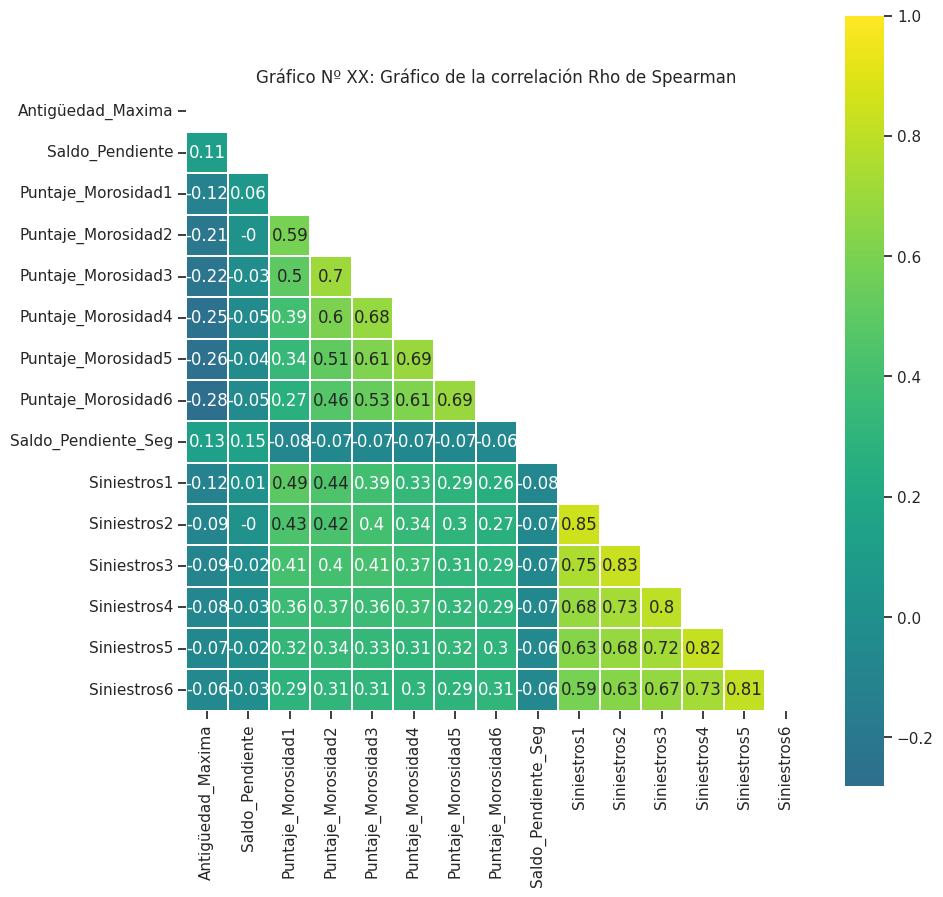

In [54]:

mask = np.triu(np.ones_like(Rho, dtype=bool )) #la máscara para el triángulo superior del gráfico

f, ax = plt.subplots(figsize = (10,10)) # la base para el gráfico

g = sns.heatmap(Rho, mask = mask, cmap='viridis', vmax=1, center = 0,
            square = True, linewidths=.1, annot=True)

g.set_title("Gráfico Nº XX: Gráfico de la correlación Rho de Spearman")


#CONCLUSIONES
1.   Con base en la exploracion del dataset de siniestros, se comprueba que la cantidad de datos perdidos superarn los datos existentes.
2.   Con el fin de obtener resultados mas certeros y sin intervencion de los datos perdidos, se calculo con el uso de scipy que nos ayudan a no tomar en cuenta estos datos.
3.  Respecto a los datos, se logra observar:

    a. A mayor antiguedad es menor el siniestro.
    b. la antiguedad esta aglomerada con respecto al nivel de ingresos, entre 0 a 50

RECOMENDACIONES

Con base en la cantidad de datos perdidos,serecomienda:

.Completar los valores perdidos.
.Agregar las reglas para reemplazar estos valores perdidosal Dataset.
.Si ninguno de los anteriores puntos, se recomienda cambiar ek dataset.